# Wind spectra for N02 case, k-sgs model

In [1]:
%%capture
# Important header information
naluhelperdir = '../../utilities'
import sys
# Change some display properties
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
import matplotlib.pyplot as plt
import numpy as np
sys.path.insert(1, naluhelperdir)
import windspectra
from matplotlib.lines import Line2D
%matplotlib inline

### Set file locations and parameters

In [2]:
datadir='/gpfs1/ahsieh/Wind/HFMQ3ABL/Neutral_OneEq/probeData'
filenames=['probe_x0500_y0500_0.dat',
    'probe_x0500_y1500_1.dat',
    'probe_x0500_y2500_2.dat',
    'probe_x1500_y0500_3.dat',
    'probe_x1500_y1500_4.dat',
    'probe_x1500_y2500_5.dat',
    'probe_x2500_y0500_6.dat',
    'probe_x2500_y1500_7.dat',
    'probe_x2500_y2500_8.dat',
          ]

zheights=[10, 20, 50, 100, 200] #[10, 20, 100]    # List of heights to calculate spectra
deltaX=3000.0/288         # Grid spacing
utau=0.340970             # Friction velocity
avgbins=[[80000.5, 84000.5],[82000.5, 86000.5]] 
saveprefix='NaluWind_N02_spectra'

In [3]:
# Define some dicts to save stuff
Suu_avg={}
Svv_avg={}
Sww_avg={}
avgUlong={}
zavg={}
favg={}
Su_Kai={}
Sv_Kai={}
Sw_Kai={}

### Load probe files and compute spectra

In [4]:
# Loop through different heights
for z in zheights:
    s=str(z)
    zavg[s]=z
    print('At height=%f'%z)
    favg[s], Suu_avg[s], Svv_avg[s], Sww_avg[s], avgUlong[s]=windspectra.avgSpectraFiles(filenames, z, datadir=datadir,verbose=True, avgbins=avgbins)

At height=10.000000
Loaded plane probe_x0500_y0500_0.dat
Loaded plane probe_x0500_y1500_1.dat
Loaded plane probe_x0500_y2500_2.dat
Loaded plane probe_x1500_y0500_3.dat
Loaded plane probe_x1500_y1500_4.dat
Loaded plane probe_x1500_y2500_5.dat
Loaded plane probe_x2500_y0500_6.dat
Loaded plane probe_x2500_y1500_7.dat
Loaded plane probe_x2500_y2500_8.dat
Averaged over 9 planes
At height=20.000000
Loaded plane probe_x0500_y0500_0.dat
Loaded plane probe_x0500_y1500_1.dat
Loaded plane probe_x0500_y2500_2.dat
Loaded plane probe_x1500_y0500_3.dat
Loaded plane probe_x1500_y1500_4.dat
Loaded plane probe_x1500_y2500_5.dat
Loaded plane probe_x2500_y0500_6.dat
Loaded plane probe_x2500_y1500_7.dat
Loaded plane probe_x2500_y2500_8.dat
Averaged over 9 planes
At height=50.000000
Loaded plane probe_x0500_y0500_0.dat
Loaded plane probe_x0500_y1500_1.dat
Loaded plane probe_x0500_y2500_2.dat
Loaded plane probe_x1500_y0500_3.dat
Loaded plane probe_x1500_y1500_4.dat
Loaded plane probe_x1500_y2500_5.dat
Loaded

### Compute Kaimal parameters

In [5]:
# Compute Kaimal at each height
for z in zheights:
    s=str(z)
    print("z=%8.2f avg Ulong = %f"%(zavg[s],avgUlong[s]))
    Su_Kai[s] = windspectra.getKaimal(favg[s], zavg[s], avgUlong[s])
    Sv_Kai[s] = windspectra.getKaimal(favg[s], zavg[s], avgUlong[s], params=windspectra.vKaimalconst)
    Sw_Kai[s] = windspectra.getKaimal(favg[s], zavg[s], avgUlong[s], params=windspectra.wKaimalconst)

z=   10.00 avg Ulong = 5.467560
z=   20.00 avg Ulong = 6.286769
z=   50.00 avg Ulong = 7.188072
z=  100.00 avg Ulong = 7.988551
z=  200.00 avg Ulong = 9.022175


### Plot spectra

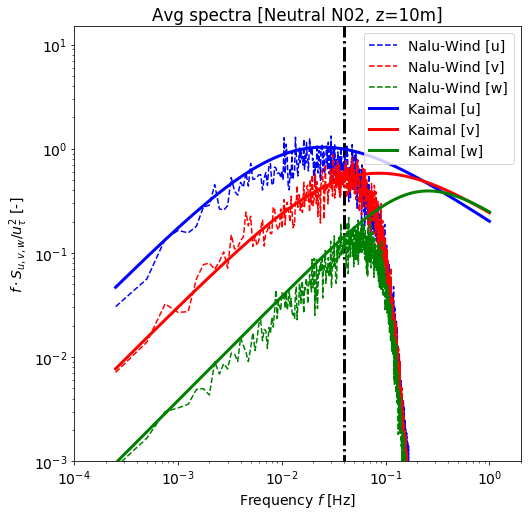

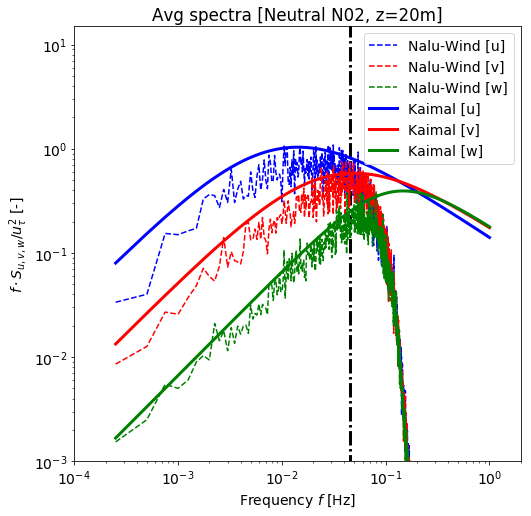

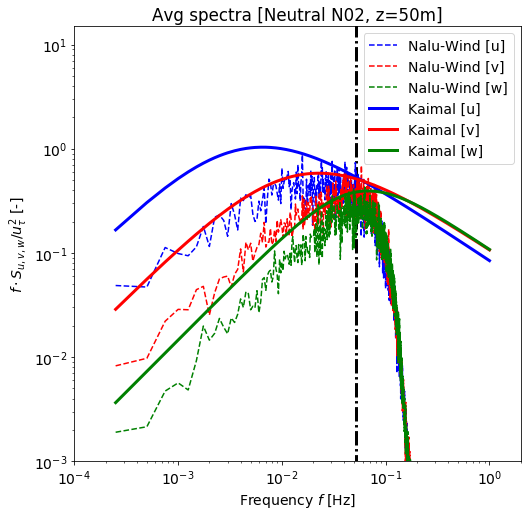

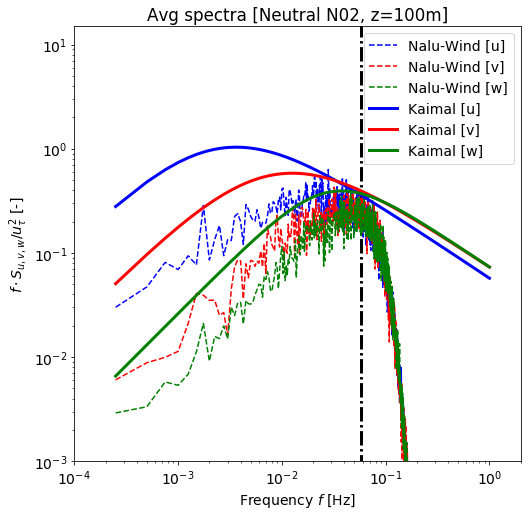

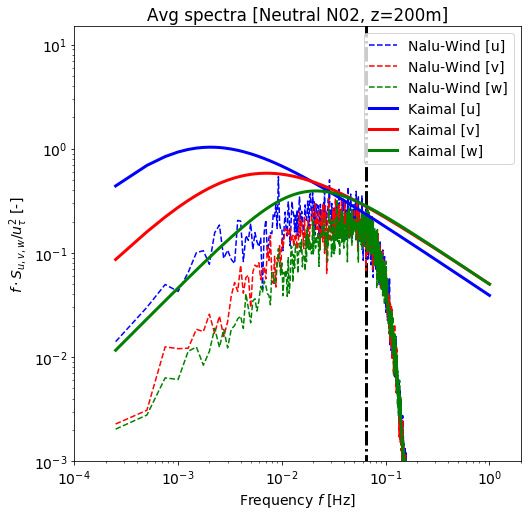

In [6]:
for z in zheights:
    s=str(z)
    # Plot the longitudinal spectral
    plt.figure(figsize=(8,8))
    plt.rc('font', size=14)
    plt.rc('xtick', labelsize=14)
    # Plot the Nalu Wind spectra
    #s='20'
    f=favg[s]
    fmax = 0.6*avgUlong[s]/(8*deltaX)
    plt.loglog(f, f*Suu_avg[s]/utau**2, 'b--', label='Nalu-Wind [u]')
    plt.loglog(f, f*Svv_avg[s]/utau**2, 'r--', label='Nalu-Wind [v]')
    plt.loglog(f, f*Sww_avg[s]/utau**2, 'g--', label='Nalu-Wind [w]')

    # Plot Kaimal
    plt.loglog(f, Su_Kai[s],'b', lw=3, label='Kaimal [u]')
    plt.loglog(f, Sv_Kai[s],'r', lw=3, label='Kaimal [v]')
    plt.loglog(f, Sw_Kai[s],'g', lw=3, label='Kaimal [w]')

    # Plot where the spectral cut-off is
    plt.vlines(fmax, 5e-4, 20,lw=3, linestyle='-.')

    # Formatting options
    plt.ylim([1E-3, 15]);
    plt.xlim([1E-4, 2]);
    plt.xlabel('Frequency $f$ [Hz]')
    plt.ylabel('$f\cdot S_{u,v,w}/u_{\\tau}^2$ [-]')
    plt.title('Avg spectra [Neutral N02, z=%sm]'%s)
    plt.legend(loc='upper right')

In [7]:
### Save the results to text files

In [8]:
for z in zheights:
    s=str(z)
    savefile=saveprefix+'_z%03i.dat'%z
    savedat=np.vstack((favg[s], Suu_avg[s], Svv_avg[s], Sww_avg[s])).transpose()
    print('Saving %s'%savefile)
    np.savetxt(savefile,savedat,header="f, Suu, Svv, Sww")

Saving NaluWind_N02_spectra_z010.dat
Saving NaluWind_N02_spectra_z020.dat
Saving NaluWind_N02_spectra_z050.dat
Saving NaluWind_N02_spectra_z100.dat
Saving NaluWind_N02_spectra_z200.dat
